# HW2
翁正朗 PB22000246 DIP

## 1

1. **DFT：**

   $\begin{pmatrix} 8 & -4-4j & 0 & -4+4j\\[1mm] 0 & 0      & 0 & 0\\[1mm] 0 & 0      & 0 & 0\\[1mm] 0 & 0      & 0 & 0 \end{pmatrix}$

2. **DCT：**

   $\begin{pmatrix} 2 & 0 & -2 & 0\\[1mm] 0 & 0 & 0  & 0\\[1mm] 0 & 0 & 0  & 0\\[1mm] 0 & 0 & 0  & 0 \end{pmatrix}$

3. **Hadamard：（归一化）**

   $\begin{pmatrix} 2 & 0 & 0 & -2\\[1mm] 0 & 0 & 0 & 0\\[1mm] 0 & 0 & 0 & 0\\[1mm] 0 & 0 & 0 & 0 \end{pmatrix}$

4. **Haar（归一化）：**

   $\begin{pmatrix} 2 & 0 & -\sqrt{2} & \sqrt{2}\\[1mm] 0 & 0 & 0 & 0\\[1mm] 0 & 0 & 0 & 0\\[1mm] 0 & 0 & 0 & 0 \end{pmatrix}\,.$


   以下为程序实现，可见由于计算精度问题，DCT存在误差

Hadamard4
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]
Walsh4
 [[ 1  1  1  1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]
 [ 1 -1  1 -1]]
H@H.T:
 [[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]
DFT Result:
 [[ 2.25+0.j   -1.  -0.75j -0.25+0.j   -1.  +0.75j]
 [ 0.25-0.j   -0.  +0.25j -0.25-0.j    0.  -0.25j]
 [ 0.25-0.j   -0.  +0.25j -0.25-0.j    0.  -0.25j]
 [ 0.25-0.j   -0.  +0.25j -0.25-0.j    0.  -0.25j]]

DCT Result:
 [[ 2.25       -0.32664074 -1.75       -0.13529903]
 [ 0.32664074 -0.4267767   0.32664074 -0.1767767 ]
 [ 0.25       -0.32664074  0.25       -0.13529903]
 [ 0.13529903 -0.1767767   0.13529903 -0.0732233 ]]

my DCT Result:
 [[ 2.25       -0.32664074 -1.75       -0.13529903]
 [ 0.32664074 -0.4267767   0.32664074 -0.1767767 ]
 [ 0.25       -0.32664074  0.25       -0.13529903]
 [ 0.13529903 -0.1767767   0.13529903 -0.0732233 ]]

Hadamard Result:
 [[ 2.25 -0.25 -0.25 -1.75]
 [ 0.25 -0.25 -0.25  0.25]
 [ 0.25 -0.25 -0.25  0.25]
 [ 0.25 -0.25 -0.25  0.25]]

Haar Result:
 [[ 2

TypeError: Image data of dtype object cannot be converted to float

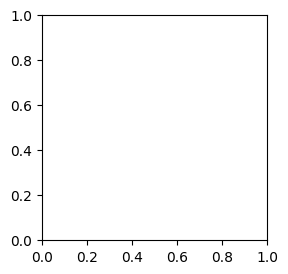

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
from scipy.linalg import hadamard

# 输入矩阵
matrix = np.array([
    [0, 1, 1, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0]
])

# DFT
def compute_dft(image):
    M, N = image.shape
    
    # 构建行频率矩阵和列频率矩阵
    u = np.arange(M)    #生成一个等差数列，0到M-1
    v = np.arange(N)
    x = np.arange(M)
    y = np.arange(N)

    # 行变换矩阵
    W_x = np.exp(-2j * np.pi * u[:, None] * x / M)
    # 列变换矩阵
    W_y = np.exp(-2j * np.pi * v[:, None] * y / N)
    
    # 对图像进行离散傅里叶变换
    dft_result = W_x @ image @ W_y.T/(np.sqrt(M*N))  # 归一化处理
    return dft_result

# DCT
def compute_dct(matrix):
    return dct(dct(matrix.T, norm='ortho').T, norm='ortho')

def compute_dct_mine(image):
    M, N = image.shape
    
    # 构建DCT变换矩阵
    u = np.arange(M)
    v = np.arange(N)
    x = np.arange(M)
    y = np.arange(N)
    
    # 计算DCT基函数
    W_x = np.sqrt(2/M)*np.cos(np.pi * (2 * x + 1) * u[:,None] / (2 * M))
    W_y = np.sqrt(2/N)*np.cos(np.pi * (2 * y + 1) * v[:, None] / (2 * N))

    # 修正第一个系数的归一化因子
    W_x[0, :] /= np.sqrt(2)
    W_y[0, :] /= np.sqrt(2)
    
    # 对图像进行离散余弦变换
    dct_result = W_x @ image @ W_y.T
    return dct_result

def gray_code(i):
    """返回整数i的Gray码"""
    return i ^ (i >> 1)

def bit_reverse(x, width):
    """对x进行width位的二进制比特倒置"""
    result = 0
    for i in range(width):
        if (x >> i) & 1:
            result |= 1 << (width - 1 - i)
    return result

def walsh_matrix(n):
    """生成n阶Walsh矩阵（Paley序）"""
    assert (n & (n-1)) == 0, "n必须为2的幂"
    H = hadamard(n)
    width = int(np.log2(n))
    idx = [bit_reverse(gray_code(i), width) for i in range(n)]
    return H[idx, :]


# Hadamard Transform
def compute_hadamard(matrix):
    # Ensure matrix is of size 2^n x 2^n
    H = hadamard(matrix.shape[0])
    W = walsh_matrix(matrix.shape[0])


    print(f"Hadamard{matrix.shape[0]}\n",H)
    print(f"Walsh{matrix.shape[0]}\n",W)
    print(f"H@H.T:\n",H@H.T) # H*H^T=nI, n is the size of the matrix
    
    # H2=hadamard(2)
    # print(np.kron(np.kron(H2,H2),H2))

    # return np.dot(np.dot(H, matrix), H)
    return H @ matrix @ H.T/(matrix.shape[0])   #归一化版本

# Haar Transform
# def compute_haar(matrix):
#     def haar_step(v):
#         result = np.zeros_like(v)
#         half = v.shape[0] // 2
#         for i in range(half):
#             result[i] = (v[2 * i] + v[2 * i + 1]) / np.sqrt(2)
#             result[half + i] = (v[2 * i] - v[2 * i + 1]) / np.sqrt(2)
#         return result

#     def haar_2d(mat):
#         rows_transformed = np.apply_along_axis(haar_step, 1, mat)
#         return np.apply_along_axis(haar_step, 0, rows_transformed)

#     return haar_2d(matrix)

#compute Haar matrix
def haarMatrix(n, normalized=False):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
        
        # combine parts
        h = 1/np.sqrt(n)*np.vstack((h_n, h_i))
        
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
        # combine parts     
        h = np.vstack((h_n, h_i))
    
    return h

def compute_haar(matrix):
    d1=matrix.shape[0]
    d2=matrix.shape[1]
    
    Hn=haarMatrix(d1,normalized=True)
    return Hn@matrix@Hn.T

# 计算变换
dft_result = compute_dft(matrix)
dct_result = compute_dct(matrix)
hadamard_result = compute_hadamard(matrix)
haar_result = compute_haar(matrix)

# 输出结果
print("DFT Result:\n", np.round(dft_result,4))
print("\nDCT Result:\n", dct_result)
print("\nmy DCT Result:\n", compute_dct_mine(matrix))
print("\nHadamard Result:\n", hadamard_result)
print("\nHaar Result:\n", haar_result)

import cv2
import matplotlib.pyplot as plt
image=cv2.imread('lena.bmp',0)

plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(compute_haar(image))),cmap='gray')
cv2.imwrite('haar.bmp',compute_haar(image))
cv2.imwrite('hadamard.bmp',compute_hadamard(image))
print(compute_haar(image))


## 2

设有一组64*64的图像,它们的协方差矩阵是单位矩阵.如果只使用一半的原始特征值计算重建图像,那么原始图像和重建图像间的均方误差是多少?  

题目意思为将64\*64的图像展开成64\*64=4096维的向量，再对N个向量做PCA。4096维的随机向量，协差阵为4096\*4096，有4096个特征值，一半就是2048个特征值。  
所以均方误差为：

$$
\text{MSE} = \sum_{i=2049}^{4096} 1 = 2048
$$

## 3

分别适用库函数和手动实现，其中库函数实现中使用了对数变换增强视觉对比度。
1. 使用库函数实现

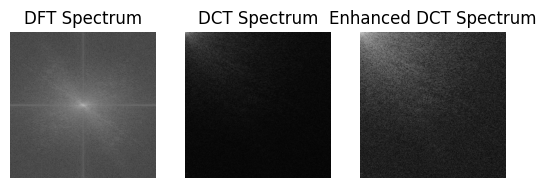

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
image = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

# 检查图像是否成功加载
if image is None:
    print("图像加载失败")
else:
    # 计算离散傅里叶变换 (DFT)
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    # 显示DFT频谱图像
    plt.subplot(131), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('DFT Spectrum'), plt.axis('off')

    # 计算离散余弦变换 (DCT)
    dct = cv2.dct(np.float32(image))
    dct_log = np.log(np.abs(dct) + 1)

    # 显示DCT频谱图像
    plt.subplot(132), plt.imshow(dct_log, cmap='gray')
    plt.title('DCT Spectrum'), plt.axis('off')

    plt.subplot(133), plt.imshow(np.log(np.abs(dct_log)+1), cmap='gray')
    plt.title('Enhanced DCT Spectrum'), plt.axis('off')

    plt.show()


手动实现

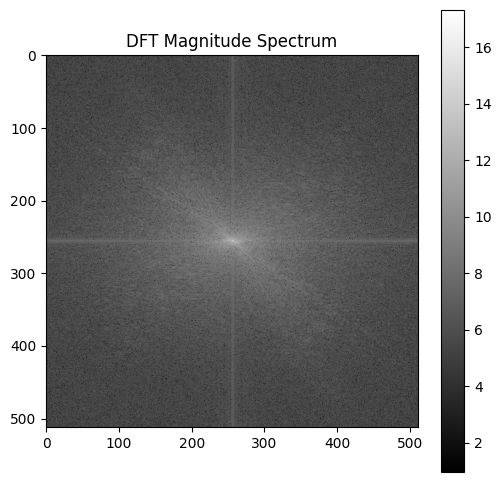

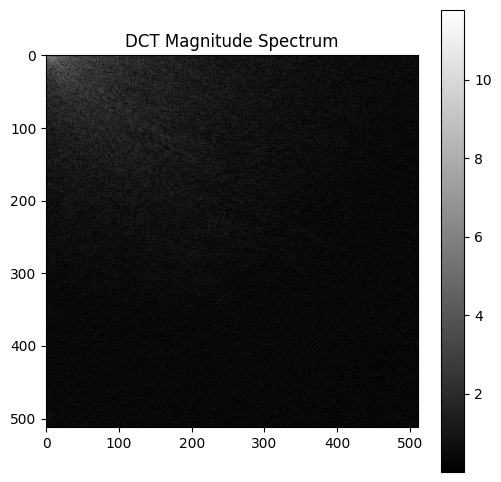

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. 使用矩阵形式实现离散傅里叶变换 (DFT)
def dft_2d_matrix(image):
    M, N = image.shape
    
    # 构建行频率矩阵和列频率矩阵
    u = np.arange(M)
    v = np.arange(N)
    x = np.arange(M)
    y = np.arange(N)

    # 行变换矩阵
    W_x = np.exp(-2j * np.pi * u[:, None] * x / M)
    # 列变换矩阵
    W_y = np.exp(-2j * np.pi * v[:, None] * y / N)
    
    # 对图像进行离散傅里叶变换
    dft_result = W_x @ image @ W_y.T
    return dft_result

# 2. 使用矩阵形式实现离散余弦变换 (DCT)
def dct_2d_matrix(image):
    M, N = image.shape
    
    # 构建DCT变换矩阵
    u = np.arange(M)
    v = np.arange(N)
    x = np.arange(M)
    y = np.arange(N)
    
    # 计算DCT基函数
    W_x = np.sqrt(2/M)*np.cos(np.pi * (2 * x + 1) * u[:,None] / (2 * M))
    W_y = np.sqrt(2/N)*np.cos(np.pi * (2 * y + 1) * v[:, None] / (2 * N))
    
    # 对图像进行离散余弦变换
    dct_result = W_x @ image @ W_y.T
    return dct_result

# 3. 图像预处理函数
def preprocess_image(image_path):
    # 使用cv2加载图像并转换为灰度图像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"无法加载图像 {image_path}")
    
    # 将图像转换为浮动格式并中心化
    img = np.float32(img)
    return img

# 4. 频谱图像显示函数
def display_spectrum(transformed_image,is_dft=True):
    # 计算幅度谱
    magnitude = np.abs(transformed_image)
    

    if is_dft == True:
        # 将频谱图像中心化（使用fftshift）
        magnitude_shifted = np.fft.fftshift(magnitude)
    else:
        magnitude_shifted =magnitude
    
    # 对数尺度增强显示效果
    log_magnitude = np.log(1 + magnitude_shifted)
    
    # 显示频谱图像
    plt.figure(figsize=(6, 6))
    plt.imshow(log_magnitude, cmap='gray')
    if is_dft == True:
        plt.title('DFT Magnitude Spectrum')
    else:   
        plt.title('DCT Magnitude Spectrum')
    plt.colorbar()
    plt.show()

# 5. 主程序：加载图像，进行DFT和DCT变换，并显示频谱图像
def main():
    image_path = 'lena.bmp'  # 图像路径
    img = preprocess_image(image_path)
    
    # 1) 计算离散傅里叶变换
    dft_result = dft_2d_matrix(img)
    display_spectrum(dft_result,is_dft=True)
    
    # 2) 计算离散余弦变换
    dct_result = dct_2d_matrix(img)
    display_spectrum(dct_result,is_dft=False)

if __name__ == '__main__':
    main()
